Enter input x1: 1
Enter input x2: 1
Enter weight w11: 1.32
Enter weight w12: -1.29
Enter weight w21: -1.34
Enter weight w22: 1.29
Enter weight w1: 0.5
Enter weight w2: 0.5
Enter target output: -3
Enter learning rate: 0.01

--- Forward Propagation ---
z1_input = -0.0200, z1_output (after sigmoid) = 0.4950
z2_input = 0.0000, z2_output (after sigmoid) = 0.5000
y_input = 0.4975, y_output (after sigmoid) = 0.6219

Error before backpropagation: 6.558977

--- Backpropagation ---
Error Gradient at Output Layer: 0.851673

Updated Weights (Output Layer):
w1 (z1->y): 0.5000 -> 0.4958
w2 (z2->y): 0.5000 -> 0.4957

Updated Weights (Hidden Layer):
w11 (x1->z1): 1.3200 -> 1.3189
w21 (x2->z1): -1.3400 -> -1.3411
w12 (x1->z2): -1.2900 -> -1.2911
w22 (x2->z2): 1.2900 -> 1.2889


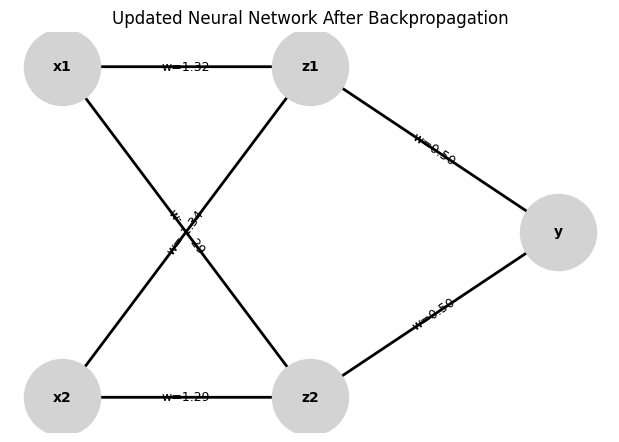


Final Output after Forward Pass: 0.6219


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

# Sigmoid activation function and its derivative
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)  # Assuming x is already sigmoid-activated

# User Inputs
x1 = float(input("Enter input x1: "))
x2 = float(input("Enter input x2: "))

w11 = float(input("Enter weight w11: "))  # x1 -> z1
w12 = float(input("Enter weight w12: "))  # x1 -> z2
w21 = float(input("Enter weight w21: "))  # x2 -> z1
w22 = float(input("Enter weight w22: "))  # x2 -> z2
w1 = float(input("Enter weight w1: "))    # z1 -> y
w2 = float(input("Enter weight w2: "))    # z2 -> y

target_output = float(input("Enter target output: "))
learning_rate = float(input("Enter learning rate: "))

# -------- Forward Propagation -------- #
z1_input = x1 * w11 + x2 * w21
z2_input = x1 * w12 + x2 * w22
z1_output = sigmoid(z1_input)
z2_output = sigmoid(z2_input)

y_input = z1_output * w1 + z2_output * w2
y_output = sigmoid(y_input)

# Print Forward Propagation results
print("\n--- Forward Propagation ---")
print(f"z1_input = {z1_input:.4f}, z1_output (after sigmoid) = {z1_output:.4f}")
print(f"z2_input = {z2_input:.4f}, z2_output (after sigmoid) = {z2_output:.4f}")
print(f"y_input = {y_input:.4f}, y_output (after sigmoid) = {y_output:.4f}")

# Compute Error
error = 0.5 * (target_output - y_output) ** 2
print(f"\nError before backpropagation: {error:.6f}")

# -------- Backpropagation -------- #
error_gradient = -(target_output - y_output) * sigmoid_derivative(y_output)

# Print error gradient
print("\n--- Backpropagation ---")
print(f"Error Gradient at Output Layer: {error_gradient:.6f}")

# Update Weights (Output Layer)
w1_new = w1 - learning_rate * error_gradient * z1_output
w2_new = w2 - learning_rate * error_gradient * z2_output

# Print updated output layer weights
print("\nUpdated Weights (Output Layer):")
print(f"w1 (z1->y): {w1:.4f} -> {w1_new:.4f}")
print(f"w2 (z2->y): {w2:.4f} -> {w2_new:.4f}")

# Update Weights (Hidden Layer)
z1_gradient = error_gradient * w1 * sigmoid_derivative(z1_output)
z2_gradient = error_gradient * w2 * sigmoid_derivative(z2_output)

w11_new = w11 - learning_rate * z1_gradient * x1
w21_new = w21 - learning_rate * z1_gradient * x2
w12_new = w12 - learning_rate * z2_gradient * x1
w22_new = w22 - learning_rate * z2_gradient * x2

# Print updated hidden layer weights
print("\nUpdated Weights (Hidden Layer):")
print(f"w11 (x1->z1): {w11:.4f} -> {w11_new:.4f}")
print(f"w21 (x2->z1): {w21:.4f} -> {w21_new:.4f}")
print(f"w12 (x1->z2): {w12:.4f} -> {w12_new:.4f}")
print(f"w22 (x2->z2): {w22:.4f} -> {w22_new:.4f}")

# -------- Plot the Neural Network -------- #
G = nx.DiGraph()

# Nodes
G.add_nodes_from(["x1", "x2", "z1", "z2", "y"])

# Edges with updated weights
edges = [("x1", "z1", w11_new), ("x1", "z2", w12_new),
         ("x2", "z1", w21_new), ("x2", "z2", w22_new),
         ("z1", "y", w1_new), ("z2", "y", w2_new)]

pos = {"x1": (-1, 1), "x2": (-1, 0),
       "z1": (0, 1), "z2": (0, 0),
       "y": (1, 0.5)}

plt.figure(figsize=(6,4))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightgray", font_size=10, font_weight="bold")
edge_labels = {(u, v): f"w={w:.2f}" for u, v, w in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=9)
nx.draw_networkx_edges(G, pos, edgelist=[(u, v) for u, v, _ in edges], width=2)

# Display results
plt.title("Updated Neural Network After Backpropagation")
plt.show()

# Print Final Output
print(f"\nFinal Output after Forward Pass: {y_output:.4f}")